In [55]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm


In [56]:
df=pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-panchenko/Statistics/hw_aa (1).csv',sep=';')
df.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


In [57]:
df.dtypes

Unnamed: 0            int64
uid                  object
experimentVariant     int64
version              object
purchase              int64
dtype: object

In [58]:
df.groupby('experimentVariant').agg({'purchase':'mean'}) # смотрим среднее и видим ,что разница есть

,purchase
experimentVariant,
0,0.023945
1,0.053242


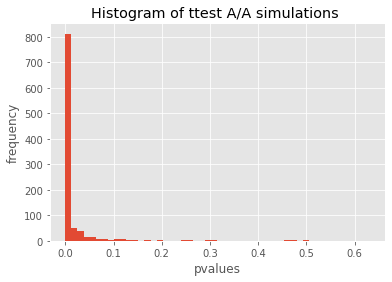

0.919

In [59]:
n = 100000
simulations = 1000
n_s = 1000
res = []



for i in tqdm(range(simulations)):
    s1 = df[df.experimentVariant==1]['purchase'].sample(n_s, replace = False).values
    s2 = df[df.experimentVariant==0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR не сойдется
sum(np.array(res) <0.05) / simulations

In [ ]:
# Видим, что более чем  в 90% случиях сравнения средних есть стат значимые различия

In [43]:
df.groupby(['experimentVariant','version'],as_index=False).agg({'purchase':'mean','Unnamed: 0':'count'})
# Сгруппируем по группе и версии МП. Впринципе уже видно что большая разница в группах с версией v2.8.0

,experimentVariant,version,purchase,Unnamed: 0
0,0,v2.8.0,0.000993,41283
1,0,v2.9.0,0.074658,11921
2,0,v3.7.4.0,0.059943,4204
3,0,v3.8.0.0,0.057604,5694
4,1,v2.8.0,0.045606,41552
5,1,v2.9.0,0.071304,12033
6,1,v3.7.4.0,0.063018,4221
7,1,v3.8.0.0,0.062848,6110


In [51]:
stats.ttest_ind(df[(df.experimentVariant==1) &(df.version=='v2.8.0')]['purchase'],df[(df.experimentVariant==0) &(df.version=='v2.8.0')]['purchase'])

Ttest_indResult(statistic=42.963540840360324, pvalue=0.0)

In [52]:
stats.ttest_ind(df[(df.experimentVariant==1) &(df.version=='v2.9.0')]['purchase'],df[(df.experimentVariant==0) &(df.version=='v2.9.0')]['purchase'])

Ttest_indResult(statistic=-0.9979597634962479, pvalue=0.31830895167207446)

In [53]:
stats.ttest_ind(df[(df.experimentVariant==1) &(df.version=='v3.7.4.0')]['purchase'],df[(df.experimentVariant==0) &(df.version=='v3.7.4.0')]['purchase'])

Ttest_indResult(statistic=0.5874925850487471, pvalue=0.5568886771079735)

In [54]:
stats.ttest_ind(df[(df.experimentVariant==1) &(df.version=='v3.8.0.0')]['purchase'],df[(df.experimentVariant==0) &(df.version=='v3.8.0.0')]['purchase'])

Ttest_indResult(statistic=1.1956188950206779, pvalue=0.23186933664059722)

In [ ]:
# Уберем из таблицы данные по пользователям МП с версией v2.8.0

In [ ]:
n = 100000
simulations = 1000
n_s = 1000
res = []



for i in tqdm(range(simulations)):
    s1 = df[(df.experimentVariant==1) & (df.version!='v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df.experimentVariant==0) & (df.version!='v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1])

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# FPR не сойдется
sum(np.array(res) <0.05) / simulations

In [ ]:
# Вывод. Проанализировав данные мы увидили, что стат значимая разница есть у пользователей с версией МП v2.8.0.
# Сплит-систма сломана. В группе 0 у нас конверсия МП v2.8.0. намного меньше чем в группе 1.